# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

I want to identify if the movies with the highest reviews generate the highest overall revenue.  I plan to use openly available datasets noting the overal revenue of movies compared to their viewer ratings. I have found two datasets:  one dataset containing movie rating information and one containing movie revenue information.

I have found the following datasets which I intend to us for this project:

1.  From OpenML:  Detailed movie descriptions - ideal for Recommendation Engines
    Website:  https://www.openml.org/search?type=data&status=active&id=43113
    Link to  data:  https://www.openml.org/data/download/22047889/dataset
2.  From OpenML:  This dataset contains IMDb ratings and votes information for movies having original title.
    Website:  https://www.openml.org/search?type=data&sort=runs&id=43784&status=active
    Link to data:  https://www.openml.org/data/download/22102609/dataset



Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV File

Method: The data was gathered programatially from OpenML.

Dataset variables:
* index INTEGER
* genres STRING
* id INTEGER
* keywords STRING
* original_title STRING
* release_date STRING
* revenue INTEGER
* status STRING
* title STRING
* cast STRING
* director STRING

From OpenML:  This dataset contains IMDb ratings and votes information for movies having original title.
* Website:  https://www.openml.org/search?type=data&sort=runs&id=43784&status=active
* Link to data:  https://www.openml.org/data/download/22102609/dataset

This dataset contains information related to movie genres, release dates, titles, directors, and revenue.


In [1]:
import pandas as pd
import json
import requests
import os
import glob
import zipfile


In [2]:
# I am creating a folder to contain the downloaded datasets.

folder_name = 'Movies_Datasets_from_Sources'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
url = ('https://www.openml.org/data/download/22047889/dataset')

In [4]:
response = requests.get(url)
response.raise_for_status()

In [5]:
file_path = os.path.join(folder_name, 'movie_revenue_dataset.txt')

print(file_path)

with open(file_path, mode = 'wb') as file:
    file.write(response.content)

Movies_Datasets_from_Sources\movie_revenue_dataset.txt


In [6]:
os.listdir(folder_name)

['movie_revenue_dataset.txt']

In [7]:
bad_lines = []

def bad_lines_logger(x):
    bad_lines.append(int(x[0]))
    return
  

In [8]:
column_names=['index', 'genres', 'id', 'keywords', 'original_title', 'release_date', 'revenue', 'status', 'title', 'cast', 'director']

# Note:  The first 16 rows are a description of the dataset.

movie_revenue_df = pd.read_csv(file_path, header=None, names=column_names, 
                      skiprows=16,
                      dtype={'index' :'str',
                            'genres':'str',
                            'id':'str',
                            'keywords':'str',
                            'original_title':'str',
                            'release_date' : 'str',
                            'revenue':'str',
                            'status':'str',
                            'title':'str',
                            'cast':'str',
                            'director':'str'},
                      index_col = None, 
                      on_bad_lines = bad_lines_logger,
                      engine='python')

In [9]:
movie_revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4716 entries, 0 to 4715
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           4716 non-null   object
 1   genres          4716 non-null   object
 2   id              4716 non-null   object
 3   keywords        4716 non-null   object
 4   original_title  4716 non-null   object
 5   release_date    4716 non-null   object
 6   revenue         4716 non-null   object
 7   status          4716 non-null   object
 8   title           4716 non-null   object
 9   cast            4716 non-null   object
 10  director        4716 non-null   object
dtypes: object(11)
memory usage: 405.4+ KB


In [10]:
len(bad_lines)

87

There are 67 of 4715 rows of data which could not be correctly read into the dataframe.  I am accepting this loss of 1.4% of the data as it should not negatively affect the answer of my original question.

In [11]:
movie_revenue_df

,index,genres,id,keywords,original_title,release_date,revenue,status,title,cast,director
0,0,'Action Adventure Fantasy Science Fiction',19995,'culture clash future space war space colony s...,Avatar,2009-12-10,2787965087,Released,Avatar,'Sam Worthington Zoe Saldana Sigourney Weaver ...,'James Cameron'
1,1,'Adventure Fantasy Action',285,'ocean drug abuse exotic island east india tra...,'Pirates of the Caribbean: At World\'s End',2007-05-19,961000000,Released,'Pirates of the Caribbean: At World\'s End','Johnny Depp Orlando Bloom Keira Knightley Ste...,'Gore Verbinski'
2,2,'Action Adventure Crime',206647,'spy based on novel secret agent sequel mi6',Spectre,2015-10-26,880674609,Released,Spectre,'Daniel Craig Christoph Waltz L\\u00e9a Seydou...,'Sam Mendes'
3,3,'Action Crime Drama Thriller',49026,'dc comics crime fighter terrorist secret iden...,'The Dark Knight Rises',2012-07-16,1084939099,Released,'The Dark Knight Rises','Christian Bale Michael Caine Gary Oldman Anne...,'Christopher Nolan'
4,4,'Action Adventure Science Fiction',49529,'based on novel mars medallion space travel pr...,'John Carter',2012-03-07,284139100,Released,'John Carter','Taylor Kitsch Lynn Collins Samantha Morton Wi...,'Andrew Stanton'
...,...,...,...,...,...,...,...,...,...,...,...
4711,4797,'Foreign Thriller',67238,?,Cavite,2005-03-12,0,Released,Cavite,?,'Neill Dela Llana'
4712,4798,'Action Crime Thriller',9367,'united states\\u2013mexico barrier legs arms ...,'El Mariachi',1992-09-04,2040920,Released,'El Mariachi','Carlos Gallardo Jaime de Hoyos Peter Marquard...,'Robert Rodriguez'
4713,4799,'Comedy Romance',72766,?,Newlyweds,2011-12-26,0,Released,Newlyweds,'Edward Burns Kerry Bish\\u00e9 Marsha Dietlei...,'Edward Burns'
4714,4801,?,126186,?,'Shanghai Calling',2012-05-03,0,Released,'Shanghai Calling','Daniel Henney Eliza Coupe Bill Paxton Alan Ru...,'Daniel Hsia'


#### Dataset 2

Type: CSV File.

Method: Download data manually from OpenML and placed into the Movies_Datasets_from_Sources folder.

Dataset variables:

* Unnamed:_0 INTEGER
* titleId STRING
* title STRING
* averageRating REAL
* numVotes INTEGER

 From OpenML:  Detailed movie descriptions - ideal for Recommendation Engines
* Website:  https://www.openml.org/search?type=data&status=active&id=43113
* Link to  data:  https://www.openml.org/data/download/22047889/dataset

This dataset contains information related to movie ratings.

In [12]:
#I am creating a method to identify rows skipped during reading.
bad_rows = []

def bad_line_logger(x):
    bad_rows.append(int(x[0]))
    return 
    

In [13]:
column_names=['index', 'titelId', 'title', 'averageRating', 'numVotes'] 

# Note:  The first 22 rows are a description of the dataset.
source = 'movie_review_data.txt'
movie_review_df = pd.read_csv(source, header=None, names=column_names, 
                      skiprows=22,
                      dtype={'index' :'str',
                            'titleId':'str',
                            'title':'str',
                            'averageRating':'str',
                            'numVotes':'str'},
                      index_col = None, 
                      on_bad_lines = bad_line_logger,
                      engine='python')


In [14]:
movie_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65584 entries, 0 to 65583
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          65584 non-null  object
 1   titelId        65584 non-null  object
 2   title          65584 non-null  object
 3   averageRating  65584 non-null  object
 4   numVotes       65584 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB


In [15]:
movie_review_df

,index,titelId,title,averageRating,numVotes
0,0,tt0000001,Carmencita,5.7,1676
1,1,tt0000002,'Le clown et ses chiens',6.1,208
2,2,tt0000003,'Pauvre Pierrot',6.5,1404
3,3,tt0000004,'Un bon bock',6.2,123
4,4,tt0000005,'Blacksmith Scene',6.2,2200
...,...,...,...,...,...
65579,67404,tt9916270,'Il talento del calabrone',5.7,853
65580,67405,tt9916362,Akelarre,5.8,199
65581,67406,tt9916428,'Hong xing zhao yao Zhong guo',3.8,12
65582,67407,tt9916460,'Pink Taxi',9.2,12


In [16]:
# bad_rows records which rows were skipped in the reading process.
len(bad_rows)

1824

There are 1824 of 67408 rows of data which could not be correctly read into the dataframe.  I accept this loss of 2.7% of the data as while it could negatively affect the answer of my original question, I believe the question will remain answered with the 97.3% of the data which was correctly read into the dataframe.  

In [17]:
movie_review_df.head()

,index,titelId,title,averageRating,numVotes
0,0,tt0000001,Carmencita,5.7,1676
1,1,tt0000002,'Le clown et ses chiens',6.1,208
2,2,tt0000003,'Pauvre Pierrot',6.5,1404
3,3,tt0000004,'Un bon bock',6.2,123
4,4,tt0000005,'Blacksmith Scene',6.2,2200


In [18]:
movie_review_df.shape

(65584, 5)

In [19]:
movie_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65584 entries, 0 to 65583
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          65584 non-null  object
 1   titelId        65584 non-null  object
 2   title          65584 non-null  object
 3   averageRating  65584 non-null  object
 4   numVotes       65584 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [20]:
#Optional: store the raw data in your local data store

In [21]:
# Creating a new folder to contain the working copies of these datasets.

folder_name = 'Movies_Datasets_WorkingDFs'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
folder_name


'Movies_Datasets_WorkingDFs'

In [22]:
# Saving the files.
# I tried creating a method to save these files; however, I am having difficulty getting the file name to translate into the address and file type.

movie_review_df.to_csv('Movies_Datasets_WorkingDFs/movie_review_df.csv')

In [23]:
movie_revenue_df.to_csv('Movies_Datasets_WorkingDFs/movie_revenue_df.csv')

In [24]:
# Viewing a list of files stored in the working copy folder.

os.listdir('Movies_Datasets_WorkingDFs')

['joined_movie_df.csv',
 'joined_movie_df_sortby_revenue.csv',
 'joined_movie_df_sortby_review.csv',
 'movie_revenue_df.csv',
 'movie_revenue_df_cleaned.csv',
 'movie_review_df.csv',
 'movie_review_df_cleaned.csv']

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [25]:
movie_review_df

,index,titelId,title,averageRating,numVotes
0,0,tt0000001,Carmencita,5.7,1676
1,1,tt0000002,'Le clown et ses chiens',6.1,208
2,2,tt0000003,'Pauvre Pierrot',6.5,1404
3,3,tt0000004,'Un bon bock',6.2,123
4,4,tt0000005,'Blacksmith Scene',6.2,2200
...,...,...,...,...,...
65579,67404,tt9916270,'Il talento del calabrone',5.7,853
65580,67405,tt9916362,Akelarre,5.8,199
65581,67406,tt9916428,'Hong xing zhao yao Zhong guo',3.8,12
65582,67407,tt9916460,'Pink Taxi',9.2,12


In [26]:
movie_revenue_df.head(5)

,index,genres,id,keywords,original_title,release_date,revenue,status,title,cast,director
0,0,'Action Adventure Fantasy Science Fiction',19995,'culture clash future space war space colony s...,Avatar,2009-12-10,2787965087,Released,Avatar,'Sam Worthington Zoe Saldana Sigourney Weaver ...,'James Cameron'
1,1,'Adventure Fantasy Action',285,'ocean drug abuse exotic island east india tra...,'Pirates of the Caribbean: At World\'s End',2007-05-19,961000000,Released,'Pirates of the Caribbean: At World\'s End','Johnny Depp Orlando Bloom Keira Knightley Ste...,'Gore Verbinski'
2,2,'Action Adventure Crime',206647,'spy based on novel secret agent sequel mi6',Spectre,2015-10-26,880674609,Released,Spectre,'Daniel Craig Christoph Waltz L\\u00e9a Seydou...,'Sam Mendes'
3,3,'Action Crime Drama Thriller',49026,'dc comics crime fighter terrorist secret iden...,'The Dark Knight Rises',2012-07-16,1084939099,Released,'The Dark Knight Rises','Christian Bale Michael Caine Gary Oldman Anne...,'Christopher Nolan'
4,4,'Action Adventure Science Fiction',49529,'based on novel mars medallion space travel pr...,'John Carter',2012-03-07,284139100,Released,'John Carter','Taylor Kitsch Lynn Collins Samantha Morton Wi...,'Andrew Stanton'


In [27]:
movie_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65584 entries, 0 to 65583
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          65584 non-null  object
 1   titelId        65584 non-null  object
 2   title          65584 non-null  object
 3   averageRating  65584 non-null  object
 4   numVotes       65584 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB


In [28]:
movie_revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4716 entries, 0 to 4715
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           4716 non-null   object
 1   genres          4716 non-null   object
 2   id              4716 non-null   object
 3   keywords        4716 non-null   object
 4   original_title  4716 non-null   object
 5   release_date    4716 non-null   object
 6   revenue         4716 non-null   object
 7   status          4716 non-null   object
 8   title           4716 non-null   object
 9   cast            4716 non-null   object
 10  director        4716 non-null   object
dtypes: object(11)
memory usage: 405.4+ KB


In [29]:
# programatically identifying if the preferred data types are already assigned to the columns.

print('I only need 3 columns from the movie_review_df dataframe.')
print('This dataframe currently has', movie_review_df.shape[1], 'columns.')
print()
print('I only need 2 columns from the movie_revenue_df dataframe.')
print('This dataframe currently has', movie_revenue_df.shape[1], 'columns.')

I only need 3 columns from the movie_review_df dataframe.
This dataframe currently has 5 columns.

I only need 2 columns from the movie_revenue_df dataframe.
This dataframe currently has 11 columns.


Issue and justification: These datasets contain more information than needed to answer the original question regarding the revenue vs. rating.  The only columns I feel are useful are the id, title/original_title, revenue, review, and averageRating.  The inclusion of the remaining fields could negatively impact the readability of the cleaned dataframes, especially after they are joined.


### Quality Issue 2:

In [30]:
# Visually reviewing the dataframe info.

movie_revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4716 entries, 0 to 4715
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           4716 non-null   object
 1   genres          4716 non-null   object
 2   id              4716 non-null   object
 3   keywords        4716 non-null   object
 4   original_title  4716 non-null   object
 5   release_date    4716 non-null   object
 6   revenue         4716 non-null   object
 7   status          4716 non-null   object
 8   title           4716 non-null   object
 9   cast            4716 non-null   object
 10  director        4716 non-null   object
dtypes: object(11)
memory usage: 405.4+ KB


In [31]:
movie_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65584 entries, 0 to 65583
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          65584 non-null  object
 1   titelId        65584 non-null  object
 2   title          65584 non-null  object
 3   averageRating  65584 non-null  object
 4   numVotes       65584 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB


In [32]:
# programatically identifying if the preferred data types are already assigned to the columns.

print("For the movie_review_df dataframe:")
print("The averageRating column is a float:  ", movie_review_df.averageRating.dtype==float)
print("The numVotes column is a integer:  ", movie_review_df.numVotes.dtype==int)
print()
print("For the movie_revenue_df dataframe:")
print("The revenue column is a float:  ", movie_revenue_df.revenue.dtype==float)


For the movie_review_df dataframe:
The averageRating column is a float:   False
The numVotes column is a integer:   False

For the movie_revenue_df dataframe:
The revenue column is a float:   False


Issue and justification: 
The data types for revenue and averageRating should be float.  In order to get the data uploaded I had to do all fields as strings due to inconcistency in the source data.  There is data in this column which is text and cannot be converted to a float.  This will need to be corrected.

I am not worried about the remaining fields as they will be removed from the final dataset.

### Tidiness Issue 1:

In [33]:
movie_review_df.sample(10)

,index,titelId,title,averageRating,numVotes
18495,19035,tt0088870,'El caballero del dragn',4.1,636
43208,44467,tt1339342,'L\'orsalher',7.1,11
30802,31669,tt1063675,'A dnes nakade',5.9,31
14397,14804,tt0060239,'Cirrhosis of the Louvre',6.6,54
51804,53273,tt7979484,'Dungeon Dudes',9.0,10
53823,55336,tt8232232,'Vitamania: The Sense and Nonsense of Vitamins',6.8,528
15512,15964,tt0084558,'Qu\'est-ce qu\'on attend pour tre heureux!',5.8,26
25045,25757,tt0098076,Pentimento,4.0,41
43684,44953,tt13523310,'Die Verwandlung',5.6,15
5386,5519,tt0048085,'Il prigioniero della montagna',5.0,65


In [34]:
movie_revenue_df.sample(10)

,index,genres,id,keywords,original_title,release_date,revenue,status,title,cast,director
3046,3089,'Action Science Fiction',32740,?,कृष,2006-06-23,0,Released,Krrish,'Hrithik Roshan Naseeruddin Shah Priyanka Chop...,'Rakesh Roshan'
3243,3291,'Crime Horror Thriller',12192,'female nudity pathology student of medicine e...,Pathology,2008-04-11,0,Released,Pathology,'Milo Ventimiglia Alyssa Milano Michael Weston...,'Marc Sch\\u00f6lermann'
1202,1213,'Fantasy Action Science Fiction Thriller Horror',440,'predator national guard hybrid alien morgue','Aliens vs Predator: Requiem',2007-12-25,41797066,Released,'Aliens vs Predator: Requiem','Steven Pasquale Reiko Aylesworth John Ortiz A...,'Colin Strause'
2123,2148,'Comedy Drama Romance Music',243,'chicago music record rock and roll record sto...,'High Fidelity',2000-03-17,47126295,Released,'High Fidelity','John Cusack Iben Hjejle Todd Louiso Jack Blac...,'Stephen Frears'
2017,2040,'Drama Thriller',2176,'california brother sister relationship loss o...,'The Glass House',2001-09-14,23619609,Released,'The Glass House','Leelee Sobieski Diane Lane Stellan Skarsg\\u0...,'Daniel Sackheim'
120,121,'Adventure Fantasy Action Comedy Family',18360,'museum theodore roosevelt duringcreditsstinge...,'Night at the Museum: Battle of the Smithsonian',2009-05-20,413106170,Released,'Night at the Museum: Battle of the Smithsonian','Ben Stiller Amy Adams Owen Wilson Hank Azaria...,'Shawn Levy'
4120,4190,'Drama Horror Thriller Romance',10894,'difficult childhood psychoterror murder lonel...,May,2002-01-13,150277,Released,May,'Angela Bettis Jeremy Sisto Anna Faris James D...,'Lucky McKee'
403,408,'Action Thriller Drama',9884,'terrorist fbi colombia firemen revenge','Collateral Damage',2002-02-06,78382433,Released,'Collateral Damage','Arnold Schwarzenegger Francesca Neri Elias Ko...,'Andrew Davis'
2164,2189,'Comedy Romance',9582,'infidelity bachelor blackmail fantasy truth','A Guy Thing',2003-01-17,17432163,Released,'A Guy Thing','Jason Lee Julia Stiles Selma Blair James Brol...,'Chris Koch'
1761,1779,'Comedy Romance',6957,'first time virgin','The 40 Year Old Virgin',2005-08-11,109449237,Released,'The 40 Year Old Virgin','Steve Carell Catherine Keener Paul Rudd Roman...,'Judd Apatow'


In [35]:
movie_review_df.shape, movie_revenue_df.shape

((65584, 5), (4716, 11))

In [36]:
movie_review_df[movie_review_df['averageRating'] == '0'].shape

(0, 5)

In [37]:
# Reviewing is any data is missing / NA.

movie_revenue_df.revenue.isna().sum()

0

In [38]:
movie_revenue_df[movie_revenue_df['revenue'] == '0'].shape

(1396, 11)

In [39]:
movie_revenue_df[movie_revenue_df['revenue'] == '0'].head(10)

,index,genres,id,keywords,original_title,release_date,revenue,status,title,cast,director
82,83,'Action Adventure Science Fiction Romance',79698,?,'The Lovers',2015-02-13,0,Released,'The Lovers','Josh Hartnett Simone Kessell Tamsin Egerton A...,'Roland Joff\\u00e9'
134,135,'Drama Horror Thriller',7978,'father son relationship victorian england rem...,'The Wolfman',2010-02-11,0,Released,'The Wolfman','Benicio del Toro Anthony Hopkins Emily Blunt ...,'Joe Johnston'
263,265,'Comedy Fantasy Family',10588,'cat brother sister relationship boredom chaos...,'The Cat in the Hat',2003-11-21,0,Released,'The Cat in the Hat','Mike Myers Dakota Fanning Spencer Breslin Kel...,'Bo Welch'
306,309,'Fantasy Comedy Family Adventure',10214,'baby mask viking','Son of the Mask',2005-02-18,0,Released,'Son of the Mask','Jamie Kennedy Alan Cumming Traylor Howard Kal...,'Lawrence Guterman'
372,376,'Science Fiction Action Drama Thriller',10357,'subway lava volcano volcanologist los angeles',Volcano,1997-04-25,0,Released,Volcano,'Tommy Lee Jones Anne Heche Gaby Hoffmann Don ...,'Mick Jackson'
401,406,'Drama Animation Family Comedy',51052,'holiday santa claus duringcreditsstinger woma...,'Arthur Christmas',2011-02-22,0,Released,'Arthur Christmas','James McAvoy Hugh Laurie Bill Nighy Jim Broad...,'Barry Cook'
428,433,'Action Comedy Crime Thriller',146216,'paris london england cia russia mi6','RED 2',2013-07-18,0,Released,'RED 2','Bruce Willis Catherine Zeta-Jones Anthony Hop...,'Dean Parisot'
448,453,'Action Comedy Crime Mystery Family',12096,'robbery investigation inspector killer clouseau','The Pink Panther',2006-01-18,0,Released,'The Pink Panther','Steve Martin Kevin Kline Jean Reno Beyonc\\u0...,'Shawn Levy'
458,463,'Romance Drama',161795,'love american pin stranger ruby','Déjà Vu',1998-04-22,0,Released,'Déjà Vu','Stephen Dillane Victoria Foyt Vanessa Redgrav...,'Henry Jaglom'
462,467,'Action Adventure Family Fantasy',9822,'gorilla dying and death','Mighty Joe Young',1998-12-25,0,Released,'Mighty Joe Young','Charlize Theron Rade Serbedzija Bill Paxton R...,'Ron Underwood'


In [40]:
# Identifying the the number of rows with 0 as the value for revenue.

print('There are', movie_revenue_df[movie_revenue_df['revenue'] == '0'].shape[0], 'rows within the movie revenue dataframe "movie_revenue_df" missing revenue data.')
print('There are', movie_review_df[movie_review_df['averageRating'] == '0'].shape[0], 'rows within the movie review dataframe "movie_review_df" missing review data.')

There are 1396 rows within the movie revenue dataframe "movie_revenue_df" missing revenue data.
There are 0 rows within the movie review dataframe "movie_review_df" missing review data.


Issue and justification: There are 1396 rows with '0' revenue listed in the movie_revenue_df dataframe.  As these rows do not contain information relevant to my question comparing ratings to revenue, I intend to remove these rows.  I do not understand why 30% of this data is missing; however, I intend to continue with this analysis with the remaining data.

### Tidiness Issue 2: 

In [41]:
movie_revenue_df.sample(10)

,index,genres,id,keywords,original_title,release_date,revenue,status,title,cast,director
2538,2571,'Drama Romance',1245,'newspaper butler country house loyalty flower','The Remains of the Day',1993-11-05,23237911,Released,'The Remains of the Day','Anthony Hopkins Emma Thompson James Fox Chris...,'James Ivory'
492,497,'Crime Thriller Horror',9533,'psychopath serial killer fbi agent','Red Dragon',2002-09-29,209196298,Released,'Red Dragon','Anthony Hopkins Edward Norton Ralph Fiennes H...,'Brett Ratner'
2825,2864,'Drama Thriller',60599,'cover-up hedge fund',Arbitrage,2012-09-14,35485056,Released,Arbitrage,'Richard Gere Susan Sarandon Tim Roth Brit Mar...,'Nicholas Jarecki'
3433,3487,'Drama History',13537,?,'Shattered Glass',2003-11-14,2944752,Released,'Shattered Glass','Hayden Christensen Peter Sarsgaard Chlo\\u00e...,'Billy Ray'
181,182,'Science Fiction Action Adventure',102899,'marvel comic superhero based on comic book af...,Ant-Man,2015-07-14,519311965,Released,Ant-Man,'Paul Rudd Michael Douglas Evangeline Lilly Co...,'Peyton Reed'
4107,4177,'Drama Music',62677,'musical independent film woman director',Songcatcher,2001-03-01,0,Released,Songcatcher,'Janet McTeer Michael Davis Michael Goodwin Gr...,'Maggie Greenwald'
3862,3927,'Comedy Drama',40247,'suicide new york infidelity cancer independen...,'Please Give',2010-01-22,0,Released,'Please Give','Rebecca Hall Catherine Keener Amanda Peet Oli...,'Nicole Holofcener'
1020,1029,'Animation Comedy Family Fantasy Science Fiction',5393,'dwarves cinderella wolf bad mother-in-law pri...,'Happily N\'Ever After',2006-09-14,38085778,Released,'Happily N\'Ever After','George Carlin Andy Dick Sarah Michelle Gellar...,'Yvette Kaplan'
111,112,'War History Action Adventure Drama',1966,'aristotle egypt greece persia elephant',Alexander,2004-11-21,167298192,Released,Alexander,'Colin Farrell Angelina Jolie Val Kilmer Jared...,'Oliver Stone'
4411,4490,'Documentary Foreign',40658,?,Starsuckers,2009-09-30,0,Released,Starsuckers,'Ellis Cashmore Max Clifford Richard Curtis Jo...,'Chris Atkins'


In [42]:
movie_review_df.sample(10)

,index,titelId,title,averageRating,numVotes
61504,63230,tt9209720,'Halsey: Without Me',7.5,81
23828,24495,tt0096320,Twins,6.1,114021
50266,51695,tt7805494,'Bigg Boss Telugu',6.9,198
43558,44825,tt1349629,'The Loneliest Road in America',6.6,18
61343,63062,tt9185526,'Superjhemp retrns',8.1,99
28507,29311,tt1017835,Sunadokei,8.7,7
38283,39386,tt1198088,'Sport at Heart',7.2,8
56385,57979,tt8544176,'This Is Nicholas - Living With Autism Spectru...,9.7,7
43140,44397,tt13387686,'Un autre monde',7.0,8
47275,48633,tt7479878,'Heegondu Dina',7.8,12


In [43]:
movie_revenue_df[movie_revenue_df['original_title'] == movie_revenue_df['title']].shape[0], movie_revenue_df.shape[0]

(4467, 4716)

In [44]:
movie_revenue_df[movie_revenue_df['original_title'] != movie_revenue_df['title']].sample(10)

,index,genres,id,keywords,original_title,release_date,revenue,status,title,cast,director
3144,3191,'Drama Foreign History War',27329,'queen thailand invasion',สุริโยไท,2001-08-17,0,Released,'The Legend of Suriyothai','M.L. Piyapas Bhirombhakdi Sarunyu Wongkrachan...,'Chatrichalerm Yukol'
4421,4500,'Thriller Mystery',181940,?,'Arnolds Park',2007-07-20,0,Released,'Carousel of Revenge','Erik Allen Randy Baranczyk Chris Carlson Ben ...,'Gene Teigland'
3261,3310,'Drama War',283708,'fire classroom hostage rain horse','Loin des hommes',2014-08-30,0,Released,'Far from Men','Viggo Mortensen Reda Kateb Djemel Barek Vince...,'David Oelhoffen'
2384,2413,'Horror Crime',41439,'survivor violence self help guru tricycle pro...,'Saw 3D',2010-10-21,136150434,Released,'Saw: The Final Chapter','Tobin Bell Costas Mandylor Betsy Russell Cary...,'Kevin Greutert'
1898,1919,'Comedy Romance',133698,?,'Un Plan parfait',2012-10-29,0,Released,'Fly Me to the Moon','Diane Kruger Dany Boon Alice Pol Robert Plagn...,'Pascal Chaumeil'
3087,3132,'Comedy Romance',42057,'london england indian lead murder matchmaking...,'Hai Marjawaan!',2010-05-07,0,Released,'It\'s a Wonderful Afterlife','Shabana Azmi Goldy Notay Sendhil Ramamurthy S...,'Gurinder Chadha'
4426,4505,'Drama Comedy',375950,'hospital doctor','Médecin de campagne',2016-03-23,0,Released,'The Country Doctor','Fran\\u00e7ois Cluzet Marianne Denicourt Isab...,'Thomas Lilti'
4010,4078,'Action Comedy',12207,'father son relationship martial arts showdown...,醉拳二,1994-02-03,0,Released,'The Legend of Drunken Master','Jackie Chan Anita Mui Ti Lung Felix Wong Liu ...,'Liu Chia-Liang'
1085,1095,'Action Drama Fantasy',1494,'poison china martial arts swordplay fight',滿城盡帶黃金甲,2006-12-21,0,Released,'Curse of the Golden Flower','Chow Yun-fat Gong Li Jay Chou Liu Ye Qin Jun-...,'Zhang Yimou'
1934,1955,'Crime Action Thriller',290864,'martial arts kung fu serial killer',一個人的武林,2014-10-31,0,Released,'Kung Fu Jungle','Donnie Yen Charlie Yeung Wang Baoqiang Bai Bi...,'Teddy Chan'


In [45]:
movie_review_df_wdiff_titles = movie_revenue_df.shape[0] -movie_revenue_df[movie_revenue_df['original_title'] == movie_revenue_df['title']].shape[0]
print('There are', movie_review_df_wdiff_titles, 'with text that do not match between the "original_title" and "title" columns.')

There are 249 with text that do not match between the "original_title" and "title" columns.


In [46]:
#  Another issue was noted regarding the qty of reviews.

movie_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65584 entries, 0 to 65583
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          65584 non-null  object
 1   titelId        65584 non-null  object
 2   title          65584 non-null  object
 3   averageRating  65584 non-null  object
 4   numVotes       65584 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB


In [47]:
movie_review_df.describe()

,index,titelId,title,averageRating,numVotes
count,65584,65584,65584,65584,65584
unique,65584,65568,63140,91,6691
top,0,tt8707008,Pilot,6.8,6
freq,1,2,28,2325,1864


In [48]:
movie_review_df = movie_review_df.astype({"numVotes": int})

In [49]:
movie_review_df.numVotes.describe()

count    6.558400e+04
mean     2.437562e+03
std      2.334232e+04
min      5.000000e+00
25%      1.900000e+01
50%      7.500000e+01
75%      3.710000e+02
max      1.515727e+06
Name: numVotes, dtype: float64

In [50]:
#progamatically identifying the total number of rows with less than 500 reviews.

print('There are', movie_review_df[ movie_review_df['numVotes'] < 500 ].value_counts().sum(), 'movies with less than 500 reviews out of', movie_review_df.shape[0], 'moview.')

There are 51554 movies with less than 500 reviews out of 65584 moview.


Issue and justification: 

One concern identified regarding the data and how it will affect answering the question is that there are many average ratings in the rating dataframe which are based on relatively few reviews.  I will arbitrarily pick a number of reviews to set as the minimum qty and remove any rows with less than this qty of reviews contributing to the average rating.

Note:  The data was read from csv into pandas without using an existing column as an index.  This has caused two columns to contain the same information, although referencing indexes from different tables.  One of these need to be removed from each dataframe and the index reset.

It appears the 'title' column contains the text of the movie titles without many of the special characters found in the "orignal_title column".  Due to this the "original_title" column will be removed as it is unlikly to match with the title data found in the moview review dataset.

Also, the titles for these movies is found listed in two different column in movie_revenue_df:  "original_title" and "title".  One of these will need to be removed to clarify and ease the intepretation of the data.

These issues will most likely be cleaned up when the unnecessary rows are removed from these dataframes.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [51]:
movie_revenue_df_cleaned = movie_revenue_df
movie_review_df_cleaned = movie_review_df

### **Quality Issue 1: FILL IN**

Restatement of status from Quality Issue 1 above:
These datasets contain more information than needed to answer the original question 
regarding the revenue vs. rating. The only columns I feel are useful are the 
id, title/original_title, revenue, review, and averageRating. 
The inclusion of the remaining fields could negatively impact the readability of the cleaned 
dataframes, especially after they are joined.

In [52]:
movie_revenue_df_cleaned.info(), movie_review_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4716 entries, 0 to 4715
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           4716 non-null   object
 1   genres          4716 non-null   object
 2   id              4716 non-null   object
 3   keywords        4716 non-null   object
 4   original_title  4716 non-null   object
 5   release_date    4716 non-null   object
 6   revenue         4716 non-null   object
 7   status          4716 non-null   object
 8   title           4716 non-null   object
 9   cast            4716 non-null   object
 10  director        4716 non-null   object
dtypes: object(11)
memory usage: 405.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65584 entries, 0 to 65583
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          65584 non-null  object
 1   titelId        65584 non-null  objec

(None, None)

In [53]:
# Overwriting the existing dataframes with the same dataframe without the unnecessary columns.

movie_revenue_df_cleaned = movie_revenue_df_cleaned[['id', 'title', 'revenue','release_date']]
movie_review_df_cleaned = movie_review_df_cleaned[['title', 'averageRating', 'numVotes']]

In [54]:
movie_revenue_df_cleaned.info(), movie_review_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4716 entries, 0 to 4715
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            4716 non-null   object
 1   title         4716 non-null   object
 2   revenue       4716 non-null   object
 3   release_date  4716 non-null   object
dtypes: object(4)
memory usage: 147.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65584 entries, 0 to 65583
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          65584 non-null  object
 1   averageRating  65584 non-null  object
 2   numVotes       65584 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 1.3+ MB


(None, None)

In [55]:
movie_revenue_df_cleaned.head(3)

,id,title,revenue,release_date
0,19995,Avatar,2787965087,2009-12-10
1,285,'Pirates of the Caribbean: At World\'s End',961000000,2007-05-19
2,206647,Spectre,880674609,2015-10-26


In [56]:
movie_review_df_cleaned.head(3)

,title,averageRating,numVotes
0,Carmencita,5.7,1676
1,'Le clown et ses chiens',6.1,208
2,'Pauvre Pierrot',6.5,1404


Justification: The cleaning of the unnecessary columns has been successful.  These dataframes now contain only 3 columns each which are useful to answering the question.  I chose to remove the unnecessary columns from the dataframes so that the focus of the analysis could be retained upon the useful information.  This removal also keeps the dataframes more easily understandable when reviewing the remaining data.

### **Quality Issue 2: FILL IN**

Restatement of status from Quality Issue 2 above:
The data types for revenue and averageRating should be float.  In order to get the data uploaded I had to do all fields as strings due to inconcistency in the source data.  There is data in this column which is text and cannot be converted to a float.  This will need to be corrected.

I am not worried about the remaining fields as they will be removed from the final dataset.

In [57]:
#Identifying visually the data types for the daataframes.

movie_revenue_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4716 entries, 0 to 4715
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            4716 non-null   object
 1   title         4716 non-null   object
 2   revenue       4716 non-null   object
 3   release_date  4716 non-null   object
dtypes: object(4)
memory usage: 147.5+ KB


In [58]:
movie_review_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65584 entries, 0 to 65583
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          65584 non-null  object
 1   averageRating  65584 non-null  object
 2   numVotes       65584 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 1.3+ MB


In [59]:
#  Reassigning the data types and reviewing .info() to see the change is complete.

movie_revenue_df_cleaned = movie_revenue_df_cleaned.astype({"id": int})

In [60]:
movie_revenue_df_cleaned = movie_revenue_df_cleaned.astype({"revenue":float})
movie_revenue_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4716 entries, 0 to 4715
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4716 non-null   int32  
 1   title         4716 non-null   object 
 2   revenue       4716 non-null   float64
 3   release_date  4716 non-null   object 
dtypes: float64(1), int32(1), object(2)
memory usage: 129.1+ KB


In [61]:
movie_review_df_cleaned = movie_review_df_cleaned.astype({"averageRating": float})

In [62]:
movie_review_df_cleaned = movie_review_df_cleaned.astype({"numVotes": int})
movie_review_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65584 entries, 0 to 65583
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          65584 non-null  object 
 1   averageRating  65584 non-null  float64
 2   numVotes       65584 non-null  int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 1.3+ MB


Justification: I have used .astype() to assign the correct datatypes to the identified columns.  This is the easiest way to achieve this goal on the dataframes I currently have.  The reassignment of data types for the identified columns has been successful and verified visually using .info().

### **Tidiness Issue 1: FILL IN**

Restatement of status from Tidiness Issue 1 above:  There are 1396 rows with '0' revenue listed in the movie_revenue_df dataframe.  As these rows do not contain information relevant to my question comparing ratings to revenue, I intend to remove these rows.  I do not understand why 30% of this data is missing; however, I intend to continue with this analysis with the remaining data.

In [63]:
movie_revenue_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4716 entries, 0 to 4715
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4716 non-null   int32  
 1   title         4716 non-null   object 
 2   revenue       4716 non-null   float64
 3   release_date  4716 non-null   object 
dtypes: float64(1), int32(1), object(2)
memory usage: 129.1+ KB


In [64]:
#  Verifying the starting qty of rows with a value of 0 for revenue.

print('We started with', movie_revenue_df_cleaned[ movie_revenue_df_cleaned['revenue'] == 0 ].value_counts().sum(), 'rows in the revenue dataframe which do not contain useful revenue data.')

We started with 1396 rows in the revenue dataframe which do not contain useful revenue data.


In [65]:
movie_revenue_df_cleaned = movie_revenue_df_cleaned.loc[movie_revenue_df_cleaned['revenue'] != 0]

In [66]:
#  Verifying the qty of rows with a value of 0 for revenue after filtering out the 0's.

print('There are now', movie_revenue_df_cleaned[ movie_revenue_df_cleaned['revenue'] == 0 ].value_counts().sum(), 'rows in the revenue dataframe which do not contain useful revenue data.')

There are now 0 rows in the revenue dataframe which do not contain useful revenue data.


In [67]:
#Reviewing the new percentiles following the change.

movie_revenue_df_cleaned.describe()

,id,revenue
count,3320.000000,3.320000e+03
mean,45488.546687,1.177097e+08
std,74794.464029,1.841241e+08
min,5.000000,5.000000e+00
25%,5656.500000,1.546679e+07
50%,11563.000000,5.200396e+07
75%,46914.000000,1.408557e+08
max,417859.000000,2.787965e+09


Justification: The lines where 'revenue' = 0 have been removed as these rows will not be useful to answer our question.  Also this will remove the need to process these unhelpful rows when manipulating the useful data.

### **Tidiness Issue 2: FILL IN**

Restate the status from Tidiness Issue 2 above:  One concern identified regarding the data and how it will affect answering the question is that there are many average ratings in the rating dataframe which are based on relatively few reviews.  I will arbitrarily pick a number of reviews to set as the minimum qty and remove any rows with less than this qty of reviews contributing to the average rating.

In [68]:
# Reviewing the percentiles prior to the change.  The lowest qty of reviews is 5.

movie_review_df_cleaned.numVotes.describe(), movie_review_df_cleaned.shape

(count    6.558400e+04
 mean     2.437562e+03
 std      2.334232e+04
 min      5.000000e+00
 25%      1.900000e+01
 50%      7.500000e+01
 75%      3.710000e+02
 max      1.515727e+06
 Name: numVotes, dtype: float64,
 (65584, 3))

In [69]:
#movie_review_df_cleaned.sort_values('averageRating', ascending=False).head(20)
#movie_review_df_cleaned.head(20)

In [70]:
# Reviewing a sample of 20 items from thie dataframe.

movie_review_df_cleaned.sample(20)

,title,averageRating,numVotes
27440,'Wild New World',8.2,5
55190,'Ladies of the Lake: Return to Avalon',6.0,16
27040,'Biography: The Trump Dynasty',7.2,148
34878,'Body of Truth',6.4,16
36261,'Templars: The Da Vinci Code Secrets',8.9,15
60866,Cheat,6.7,2129
11119,'El vampiro sangriento',5.4,187
42039,'Entscheidung in den Wolken',4.7,171
53357,'The village',7.7,33
33264,Preboj,6.2,86


In [71]:
# Reviewing the qty of rows with numVotes values less than 500.

movie_review_df_cleaned[ movie_review_df_cleaned['numVotes'] < 500 ].value_counts().sum()

51554

In [72]:
movie_review_df_cleaned = movie_review_df_cleaned.loc[movie_review_df_cleaned['numVotes'] > 500 ]

In [73]:
# Reviewing the qty of rows with numVotes values after filtering with less than 500.  
# Also reviewing the number of remaining rows of data.

movie_review_df_cleaned[ movie_review_df_cleaned['numVotes'] < 500 ].value_counts().sum(), movie_review_df_cleaned.shape

(0, (14015, 3))

In [74]:
movie_review_df_cleaned.describe()

,averageRating,numVotes
count,14015.000000,1.401500e+04
mean,6.566044,1.106559e+04
std,1.245668,4.954933e+04
min,1.000000,5.010000e+02
25%,5.900000,8.280000e+02
50%,6.700000,1.554000e+03
75%,7.400000,4.345500e+03
max,10.000000,1.515727e+06


In [75]:
print('There are', movie_review_df_cleaned[ movie_review_df_cleaned['numVotes'] < 500 ].value_counts().sum(), 'movies with less than 500 reviews out of', movie_review_df_cleaned.shape[0], 'moview.')

There are 0 movies with less than 500 reviews out of 14015 moview.


Justification: The number of rows with less than 500 votes in the numVotes column have been removed by filtering out the unwanted data and assigning the remaining data to their respective dataframes.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

I am saving these cleaned dataframes prior to joining.

In [76]:
# Saving the dataframes prior to join.

movie_review_df_cleaned.to_csv('Movies_Datasets_WorkingDFs/movie_review_df_cleaned.csv')

In [77]:
movie_revenue_df_cleaned.to_csv('Movies_Datasets_WorkingDFs/movie_revenue_df_cleaned.csv')

In [78]:
os.listdir('Movies_Datasets_WorkingDFs')

['joined_movie_df.csv',
 'joined_movie_df_sortby_revenue.csv',
 'joined_movie_df_sortby_review.csv',
 'movie_revenue_df.csv',
 'movie_revenue_df_cleaned.csv',
 'movie_review_df.csv',
 'movie_review_df_cleaned.csv']

In [79]:
# Verifying data types prior to join.

movie_review_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14015 entries, 0 to 65579
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          14015 non-null  object 
 1   averageRating  14015 non-null  float64
 2   numVotes       14015 non-null  int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 383.2+ KB


In [80]:
movie_revenue_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3320 entries, 0 to 4712
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3320 non-null   int32  
 1   title         3320 non-null   object 
 2   revenue       3320 non-null   float64
 3   release_date  3320 non-null   object 
dtypes: float64(1), int32(1), object(2)
memory usage: 116.7+ KB


In [81]:
joined_movie_df = pd.merge(movie_review_df_cleaned, movie_revenue_df_cleaned, on='title', how='inner')
joined_movie_df

,title,averageRating,numVotes,id,revenue,release_date
0,'Alice in Wonderland',6.3,2371,12155,1.025491e+09,2010-03-03
1,'Alice in Wonderland',7.0,744,12155,1.025491e+09,2010-03-03
2,'Alice in Wonderland',7.3,2820,12155,1.025491e+09,2010-03-03
3,'Alice in Wonderland',6.4,383986,12155,1.025491e+09,2010-03-03
4,'A Christmas Carol',6.0,593,17979,3.252339e+08,2009-11-04
...,...,...,...,...,...,...
637,Ghost,5.1,1267,251,5.050000e+08,1990-07-12
638,Special,7.6,5844,13856,7.202000e+03,2006-01-30
639,'The Story of Us',6.5,858,12220,5.890003e+07,1999-10-13
640,Stardust,3.8,705,2270,1.355600e+08,2007-08-09


In [82]:
# Reviewing the details of the new joined dataframe.

joined_movie_df.shape, joined_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          642 non-null    object 
 1   averageRating  642 non-null    float64
 2   numVotes       642 non-null    int32  
 3   id             642 non-null    int32  
 4   revenue        642 non-null    float64
 5   release_date   642 non-null    object 
dtypes: float64(2), int32(2), object(2)
memory usage: 25.2+ KB


((642, 6), None)

In [83]:
#  Creating two new dataframes with the data sorted.  This will make reviewing from the different criteria easier.

joined_movie_df_sortby_review = joined_movie_df.sort_values('averageRating', ascending=False)
joined_movie_df_sortby_review.head(20)

,title,averageRating,numVotes,id,revenue,release_date
439,Quarantine,9.2,1431,13812,4.085542e+07,2008-10-10
385,Identity,9.1,1028,2832,9.025954e+07,2003-04-25
611,Barbershop,9.1,2375,10611,7.578164e+07,2002-04-01
34,College,9.0,4638,13991,6.230276e+06,2008-08-28
628,Savages,9.0,1677,82525,8.296615e+07,2012-07-06
57,'12 Angry Men',9.0,689432,389,1.000000e+06,1957-03-25
168,'First Blood',8.9,3456,1368,1.252129e+08,1982-10-22
384,Doubt,8.8,935,14359,5.090723e+07,2008-11-27
399,Home,8.6,21412,228161,3.688710e+08,2015-03-18
629,300,8.6,900,1271,4.226104e+08,2006-12-09


In [84]:
joined_movie_df_sortby_revenue = joined_movie_df.sort_values('revenue', ascending=False)
joined_movie_df_sortby_revenue.head(20)

,title,averageRating,numVotes,id,revenue,release_date
86,'The Avengers',8.3,6779,24428,1.519558e+09,2012-04-25
583,Frozen,6.1,67929,109445,1.274219e+09,2013-11-27
435,Skyfall,7.7,630406,37724,1.108561e+09,2012-10-25
587,'The Dark Knight Rises',8.4,1515727,49026,1.084939e+09,2012-07-16
561,'Pirates of the Caribbean: On Stranger Tides',6.6,481095,1865,1.045714e+09,2011-05-14
0,'Alice in Wonderland',6.3,2371,12155,1.025491e+09,2010-03-03
2,'Alice in Wonderland',7.3,2820,12155,1.025491e+09,2010-03-03
3,'Alice in Wonderland',6.4,383986,12155,1.025491e+09,2010-03-03
1,'Alice in Wonderland',7.0,744,12155,1.025491e+09,2010-03-03
418,'Pirates of the Caribbean: At World\'s End',7.1,970,285,9.610000e+08,2007-05-19


Duplicate entrie found in the top 20 results based on movie ID.  I will review how many duplicates we have and remove any duplicates keeping the one with the highest number of votes.

In [85]:
#  Sorting the joined dataframe by numVotes to easily remove the duplicates keeping the most reviewed line of data.

joined_movie_df = joined_movie_df.sort_values('numVotes', ascending=False)
joined_movie_df[joined_movie_df.duplicated('title', keep=False) == True].head(20)

,title,averageRating,numVotes,id,revenue,release_date
82,Psycho,8.5,603950,539,3.200000e+07,1960-06-16
3,'Alice in Wonderland',6.4,383986,12155,1.025491e+09,2010-03-03
222,Ghostbusters,7.8,355274,43074,2.291475e+08,2016-07-14
143,Batman,7.5,338424,268,4.113489e+08,1989-06-23
46,'Top Gun',6.9,295351,744,3.568306e+08,1986-05-16
68,'The Untouchables',7.9,281692,117,7.627045e+07,1987-06-02
146,'Dark Shadows',6.2,247510,62213,2.455271e+08,2012-05-08
167,'First Blood',7.7,226441,1368,1.252129e+08,1982-10-22
44,'The Lone Ranger',6.4,221360,57201,8.928991e+07,2013-07-03
224,Ghostbusters,6.5,204327,43074,2.291475e+08,2016-07-14


In [86]:
# Identifying the number of duplicate rows.

joined_movie_df[joined_movie_df.duplicated('title', keep=False) == True].value_counts().sum()

105

In [87]:
# Removing duplicates and identifying the number of duplicate rows following dropping duplicates.

joined_movie_df.drop_duplicates(subset=['title'], keep='first', inplace=True)
joined_movie_df[joined_movie_df.duplicated('title', keep=False) == True].value_counts().sum()

0

I will have a look at the top 20 based on revenue and review.

In [88]:
# Recreating the sorted versions of the joined dataframe:  1 for revenue and 1 for reviews.

joined_movie_df_sortby_revenue = joined_movie_df.sort_values('revenue', ascending=False)
joined_movie_df_sortby_revenue.head(20)

,title,averageRating,numVotes,id,revenue,release_date
86,'The Avengers',8.3,6779,24428,1.519558e+09,2012-04-25
583,Frozen,6.1,67929,109445,1.274219e+09,2013-11-27
435,Skyfall,7.7,630406,37724,1.108561e+09,2012-10-25
587,'The Dark Knight Rises',8.4,1515727,49026,1.084939e+09,2012-07-16
561,'Pirates of the Caribbean: On Stranger Tides',6.6,481095,1865,1.045714e+09,2011-05-14
3,'Alice in Wonderland',6.4,383986,12155,1.025491e+09,2010-03-03
418,'Pirates of the Caribbean: At World\'s End',7.1,970,285,9.610000e+08,2007-05-19
490,'The Hobbit: The Desolation of Smaug',7.8,601155,57158,9.584000e+08,2013-12-11
601,'Harry Potter and the Half-Blood Prince',7.3,854,767,9.339592e+08,2009-07-07
163,'E.T. the Extra-Terrestrial',7.8,372343,601,7.929106e+08,1982-04-03


In [89]:
joined_movie_df_sortby_review = joined_movie_df.sort_values('averageRating', ascending=False)
joined_movie_df_sortby_review.head(20)

,title,averageRating,numVotes,id,revenue,release_date
611,Barbershop,9.1,2375,10611,7.578164e+07,2002-04-01
34,College,9.0,4638,13991,6.230276e+06,2008-08-28
628,Savages,9.0,1677,82525,8.296615e+07,2012-07-06
57,'12 Angry Men',9.0,689432,389,1.000000e+06,1957-03-25
384,Doubt,8.8,935,14359,5.090723e+07,2008-11-27
399,Home,8.6,21412,228161,3.688710e+08,2015-03-18
580,Watchmen,8.6,2900,13183,1.852590e+08,2009-03-05
629,300,8.6,900,1271,4.226104e+08,2006-12-09
239,'Back to the Future',8.5,1057549,105,3.811098e+08,1985-07-03
82,Psycho,8.5,603950,539,3.200000e+07,1960-06-16


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [90]:
# Saving the dataframes following join and sorting.

joined_movie_df.to_csv('Movies_Datasets_WorkingDFs/joined_movie_df.csv')

In [91]:
joined_movie_df_sortby_revenue.to_csv('Movies_Datasets_WorkingDFs/joined_movie_df_sortby_revenue.csv')

In [92]:
joined_movie_df_sortby_review.to_csv('Movies_Datasets_WorkingDFs/joined_movie_df_sortby_review.csv')

In [93]:
# Reviewing the files currently saved.

os.listdir('Movies_Datasets_WorkingDFs')

['joined_movie_df.csv',
 'joined_movie_df_sortby_revenue.csv',
 'joined_movie_df_sortby_review.csv',
 'movie_revenue_df.csv',
 'movie_revenue_df_cleaned.csv',
 'movie_review_df.csv',
 'movie_review_df_cleaned.csv']

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

Research question: I want to identify if the movies with the highest reviews generate the highest overall revenue. 

I am creating two columns which represent a percent of max revenue (1.519558e+09) and a percent of max rating (10).  This is intended to present the data in a more easily interpretable way.  This will cerate two scales from 0 to 1 instead of one scale to 1519557910 and one to 10.

In [94]:
# Setting a max for rating and revenue from which the range of 0 - 1 will be created.

max_rating = 10
max_rating

10

In [95]:
max_revenue = joined_movie_df['revenue'].max()
max_revenue

1519557910.0

In [96]:
#  Creating two new rows for the new percentages.

joined_movie_df['percent_of_max_revenue'] = (joined_movie_df['averageRating'] / max_rating)
joined_movie_df['percent_of_max_review'] = (joined_movie_df['revenue'] / max_revenue)

In [97]:
# Verifying the new rows have been created.

joined_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 587 to 280
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   584 non-null    object 
 1   averageRating           584 non-null    float64
 2   numVotes                584 non-null    int32  
 3   id                      584 non-null    int32  
 4   revenue                 584 non-null    float64
 5   release_date            584 non-null    object 
 6   percent_of_max_revenue  584 non-null    float64
 7   percent_of_max_review   584 non-null    float64
dtypes: float64(4), int32(2), object(2)
memory usage: 36.5+ KB


In [98]:
# Recreating the sorted by dataframes following the changes to the join dataframe.

joined_movie_df_sortby_review = joined_movie_df.sort_values('percent_of_max_review', ascending=False)

In [99]:
joined_movie_df_sortby_revenue = joined_movie_df.sort_values('percent_of_max_revenue', ascending=False)

I am saving the new dataframes following the update.

In [100]:
joined_movie_df.to_csv('Movies_Datasets_WorkingDFs/joined_movie_df.csv')

In [101]:
joined_movie_df_sortby_review.to_csv('Movies_Datasets_WorkingDFs/joined_movie_df_sortby_review.csv')

In [102]:
joined_movie_df_sortby_revenue.to_csv('Movies_Datasets_WorkingDFs/joined_movie_df_sortby_revenue.csv')

In [103]:
os.listdir('Movies_Datasets_WorkingDFs')

['joined_movie_df.csv',
 'joined_movie_df_sortby_revenue.csv',
 'joined_movie_df_sortby_review.csv',
 'movie_revenue_df.csv',
 'movie_revenue_df_cleaned.csv',
 'movie_review_df.csv',
 'movie_review_df_cleaned.csv']

In [104]:
import matplotlib.pyplot as plt

I am now generating the graphs related to the research question.

Creating a dataframe of only the top 10 based on revenue or ratings respectively.

In [105]:
# limiting the charts to the top 16 based on revenue and rating.
#  16 was chosen so that at least one movie would appear in each chart.

joined_movie_df_sortby_revenue_top = joined_movie_df_sortby_revenue.head(16)


In [106]:
joined_movie_df_sortby_review_top = joined_movie_df_sortby_review.head(16)

In [107]:
joined_movie_df_sortby_revenue_top.shape

(16, 8)

In [108]:
joined_movie_df.head()

,title,averageRating,numVotes,id,revenue,release_date,percent_of_max_revenue,percent_of_max_review
587,'The Dark Knight Rises',8.4,1515727,49026,1.084939e+09,2012-07-16,0.84,0.713983
463,'Shutter Island',8.2,1129155,11324,2.948042e+08,2010-02-18,0.82,0.194007
239,'Back to the Future',8.5,1057549,105,3.811098e+08,1985-07-03,0.85,0.250803
422,Up,8.2,935115,14160,7.350991e+08,2009-05-13,0.82,0.483759
598,'Mad Max: Fury Road',8.1,881816,76341,3.788583e+08,2015-05-13,0.81,0.249321


In [271]:
#creating method to get the correlation coefficient
from scipy.stats import pearsonr

def get_corr_coef(x, y, year_range):
    
    # Calculate Pearson correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(x, y)
    print(f"Correlation Coefficient: {correlation_coefficient:.3f}, P Value: {p_value:.3f}")

    global correlation_coefficients
    global p_values
    
    correlation_coefficients[year_range] = correlation_coefficient
    p_values[year_range] = p_value
       

In [272]:
# Creating methods for charting the top movies based on revenue or rating.
# Each chart will contain the values for both the movie's percent of max for review and rating.
import datetime as dt

def chart_top_revenue_vs_rating(year='all'):
    
    global search_df
    search_df = joined_movie_df
  
    if year != 'all':
        #creating "release_year" column for filtering
        search_df['release_year'] = pd.DatetimeIndex(search_df['release_date']).year
        #filter by provided year using release year column
        search_df = search_df.loc[search_df['release_year'] == int(year)]   
        #setting year for plot titles
        year_range= (f"{year}")
    else:
        #setting year range for plot titles if all  years used
        min_year = search_df['release_year'].min()
        max_year = search_df['release_year'].max()
        year_range = (f"{min_year} to {max_year}")
    
    # creating sorted dataframes for plots
    joined_movie_df_sortby_review = search_df.sort_values('percent_of_max_review', ascending=False)
    joined_movie_df_sortby_revenue = search_df.sort_values('percent_of_max_revenue', ascending=False)
    
    #pull top 10 movies based on revenue or rating
    joined_movie_df_sortby_review_top = joined_movie_df_sortby_review.head(10)
    joined_movie_df_sortby_revenue_top = joined_movie_df_sortby_revenue.head(10)
    
    #creating chart based on revenue
    chart1 = joined_movie_df_sortby_revenue_top.plot.barh(x = 'title', y = ['percent_of_max_revenue', 'percent_of_max_review'], rot = 30, legend=False)
    chart1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    chart1.set_title(f"Top 10 Movies Based on Revenue for {year_range}")
    chart1.set_xlabel("% of Max Rating / Revenue")
    chart1.set_ylabel("Movie")
    ;

    #creating chart based on rating
    chart2 = joined_movie_df_sortby_review_top.plot.barh(x = 'title', y = ['percent_of_max_revenue', 'percent_of_max_review'], rot = 30, legend=False)
    chart2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    chart2.set_title(f"Top 10 Movies Based on Ratings for {year_range}")
    chart2.set_xlabel("% of Max Rating / Revenue")
    chart2.set_ylabel("Movie")
    ;
    
    # Creating a scatter chart of review vs. rating data.
    scatter_graph1 = search_df.plot.scatter(x='percent_of_max_revenue', y='percent_of_max_review', c='DarkBlue')
    scatter_graph1.set_title(f"Scatter Plot for All Movie Ratings vs. Movie Revenue for {year_range}")
    ;

    get_corr_coef(search_df['percent_of_max_revenue'], search_df['percent_of_max_review'], year_range)

    #__________________________FIXME__________________Get dic of corr coef results per year and for all_____________________
    #corr_coef, p_value = get_corr_coef(search_df['percent_of_max_revenue'], search_df['percent_of_max_review'])
    #correlation_coefficients[year_range] = corr_coef
    #p_values[year_range] = pvalue


In [ ]:
#get_corr_coef(search_df['percent_of_max_revenue'], search_df['percent_of_max_review'], year_range)



Correlation Coefficient: 0.106, P Value: 0.466


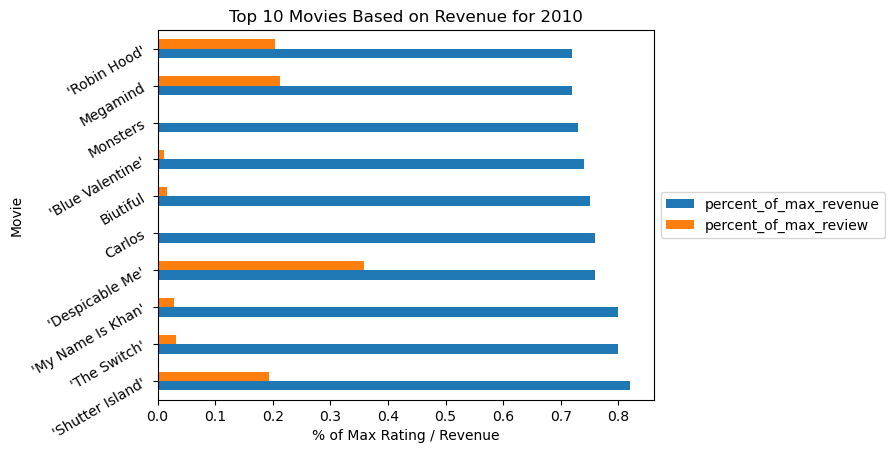

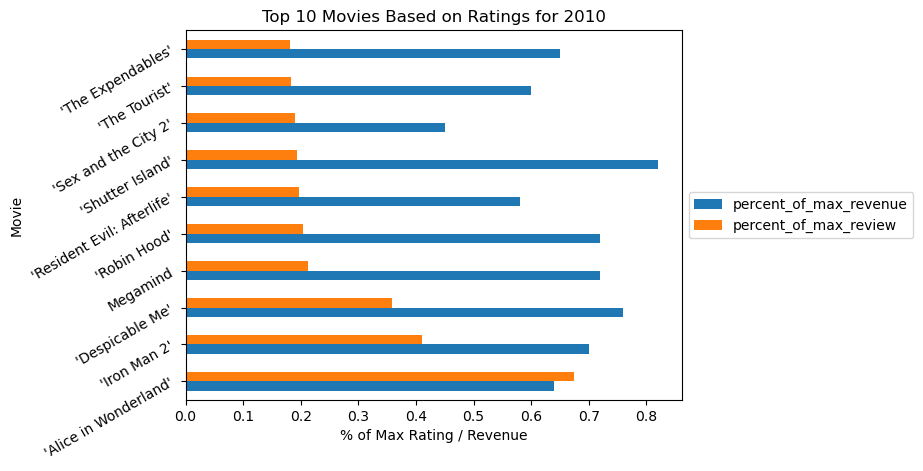

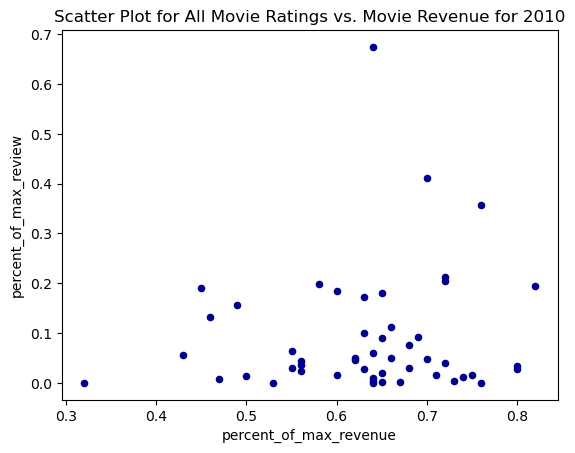

In [273]:
# Creating charts for Top 10 based on rating and based on revenue.  
# Each chart will contain the values for both the movie's percent of max for review and rating.

chart_top_revenue_vs_rating(2010)


Correlation Coefficient: 0.190, P Value: 0.275


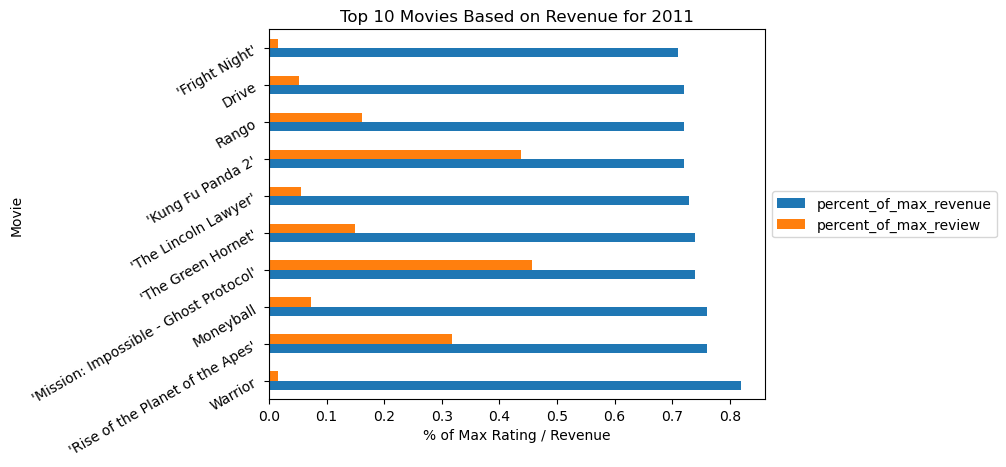

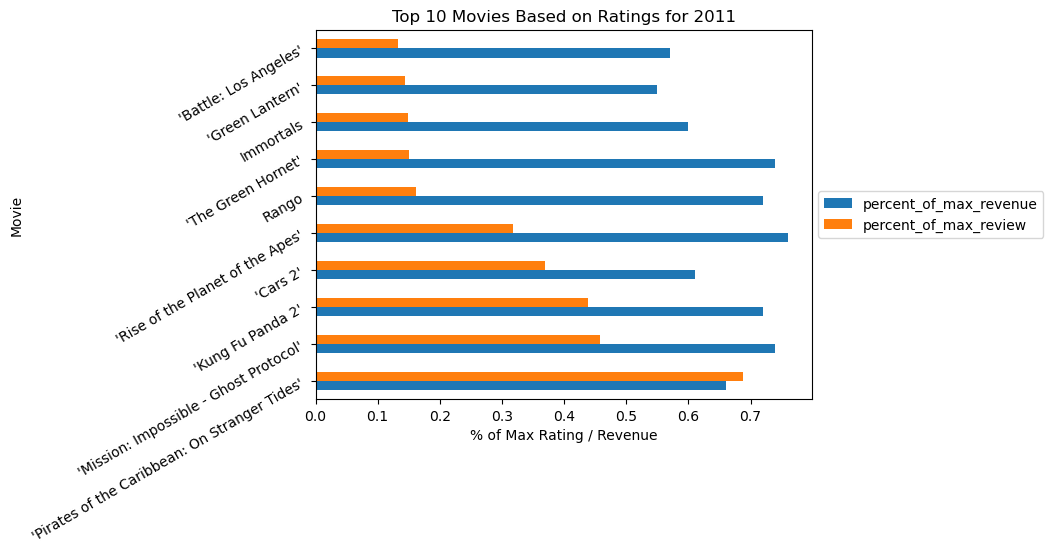

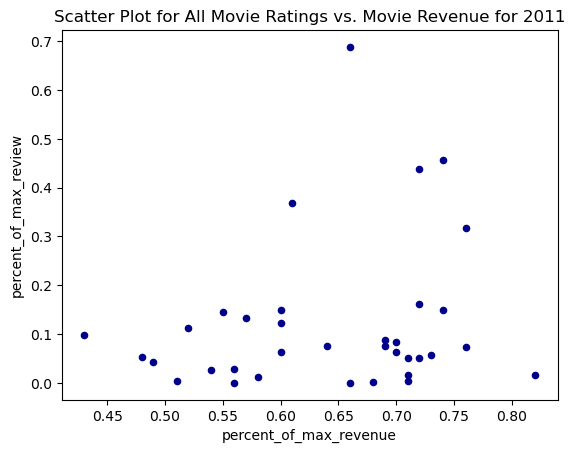

In [274]:
chart_top_revenue_vs_rating(2011)

Correlation Coefficient: 0.548, P Value: 0.007


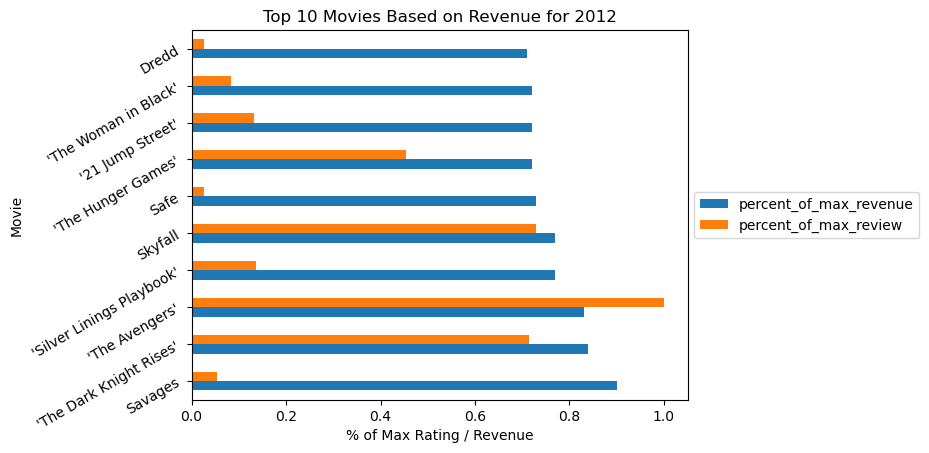

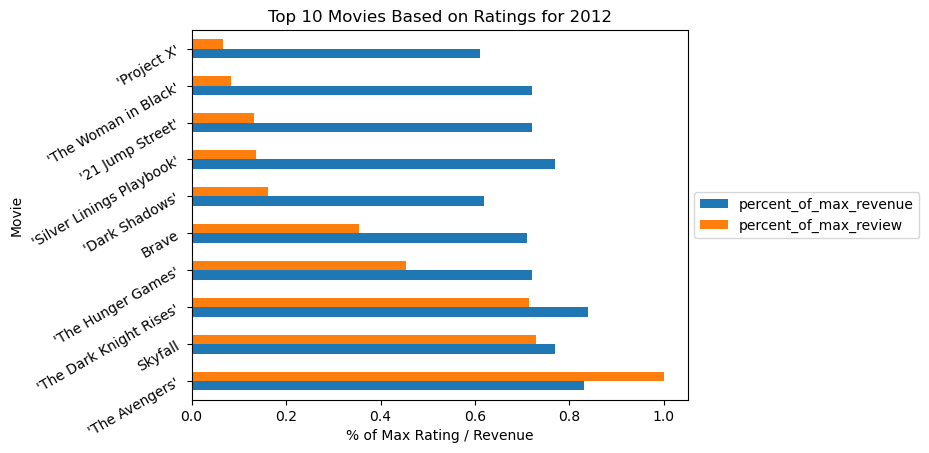

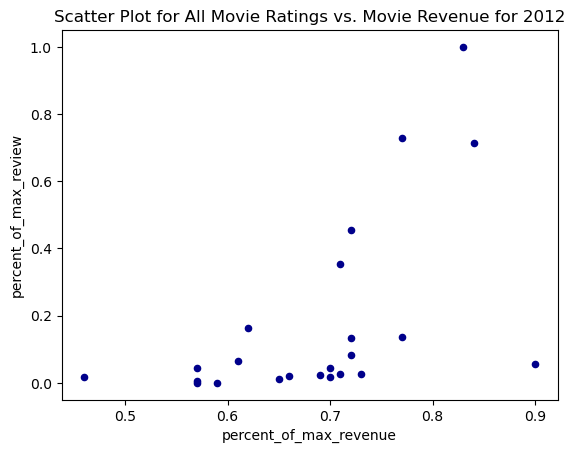

In [275]:
chart_top_revenue_vs_rating(2012)

Correlation Coefficient: 0.140, P Value: 0.579


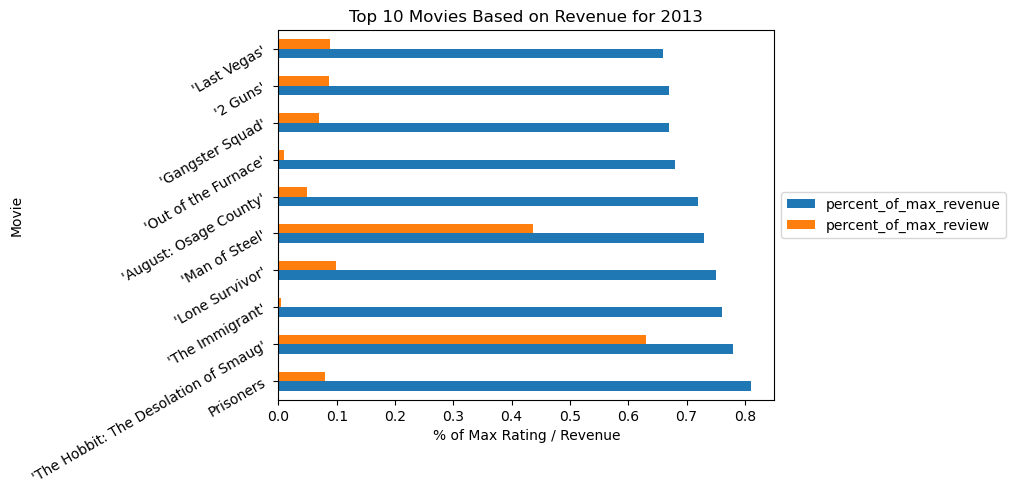

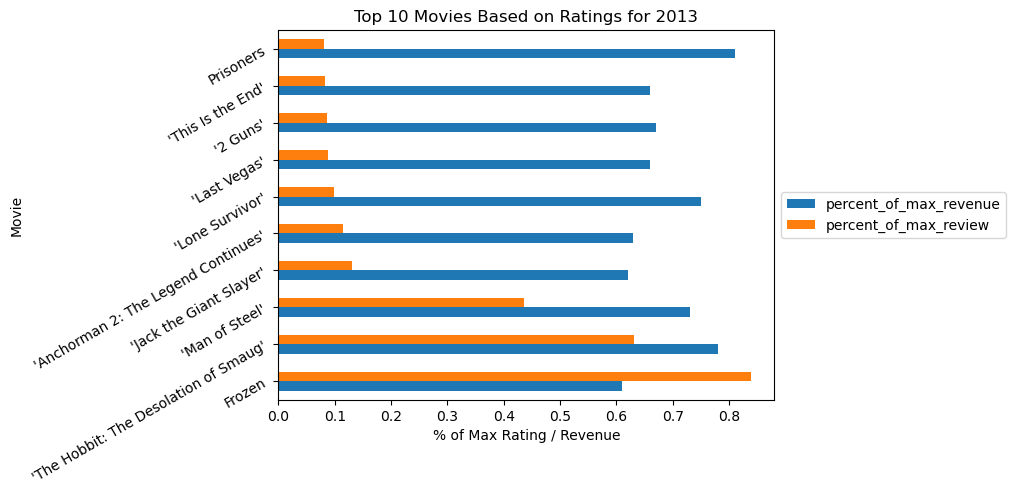

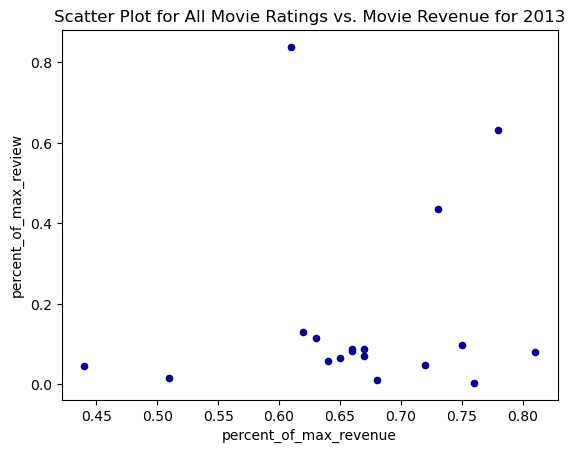

In [276]:
chart_top_revenue_vs_rating(2013)

Correlation Coefficient: -0.028, P Value: 0.918


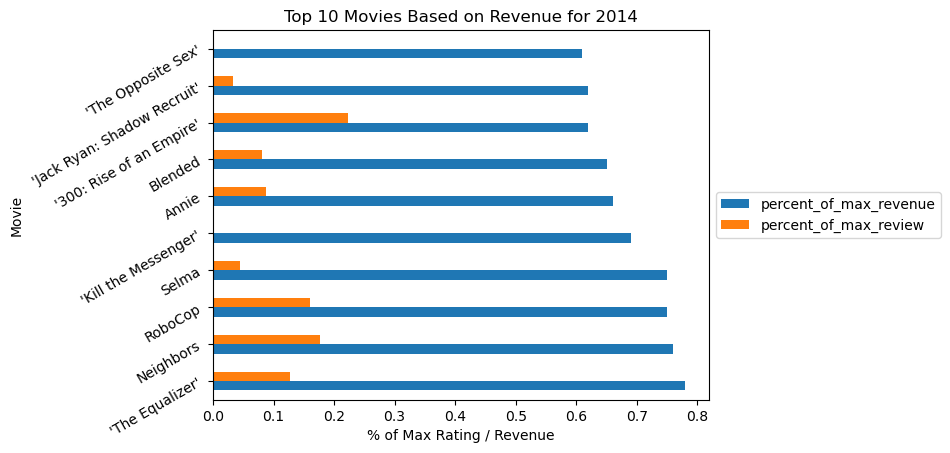

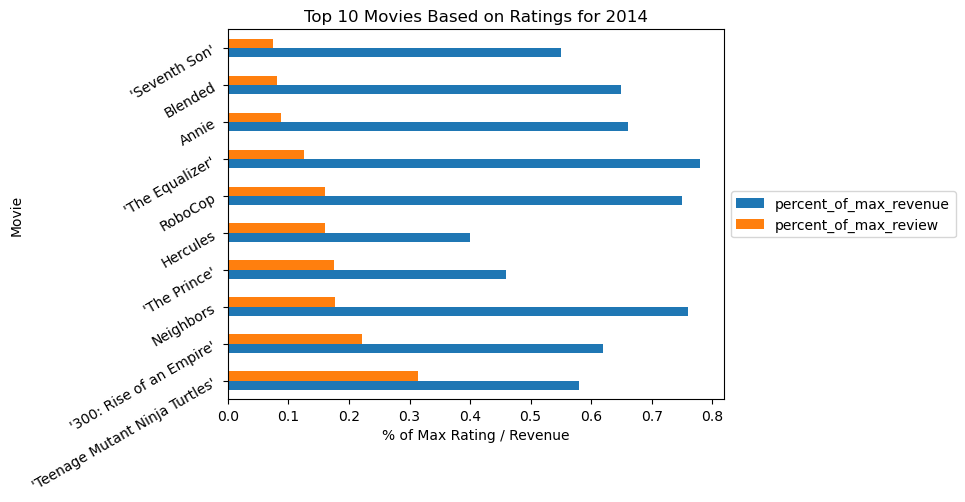

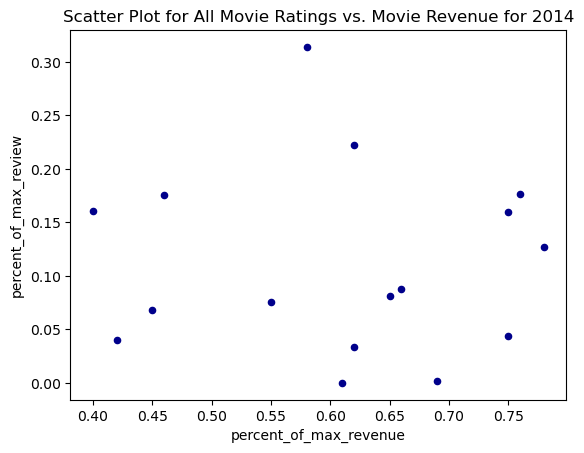

In [277]:
chart_top_revenue_vs_rating(2014)

Correlation Coefficient: 0.573, P Value: 0.020


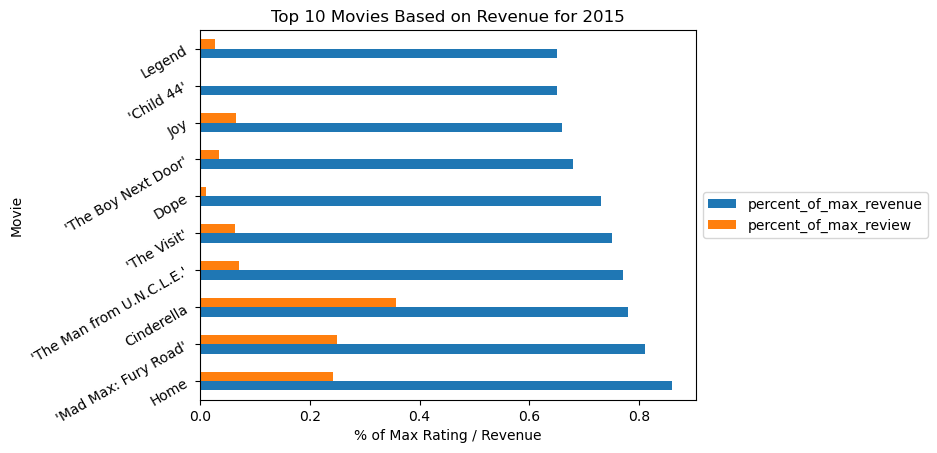

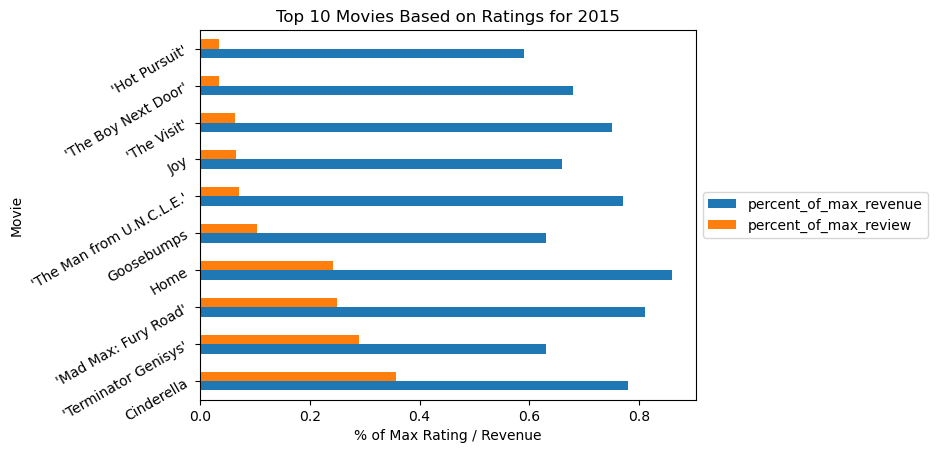

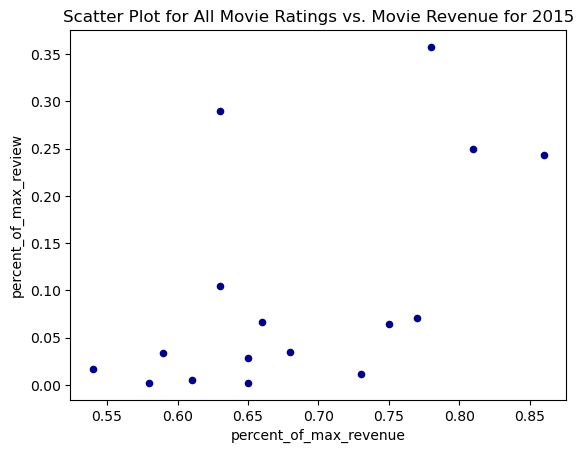

In [278]:
chart_top_revenue_vs_rating(2015)

Correlation Coefficient: -0.213, P Value: 0.530


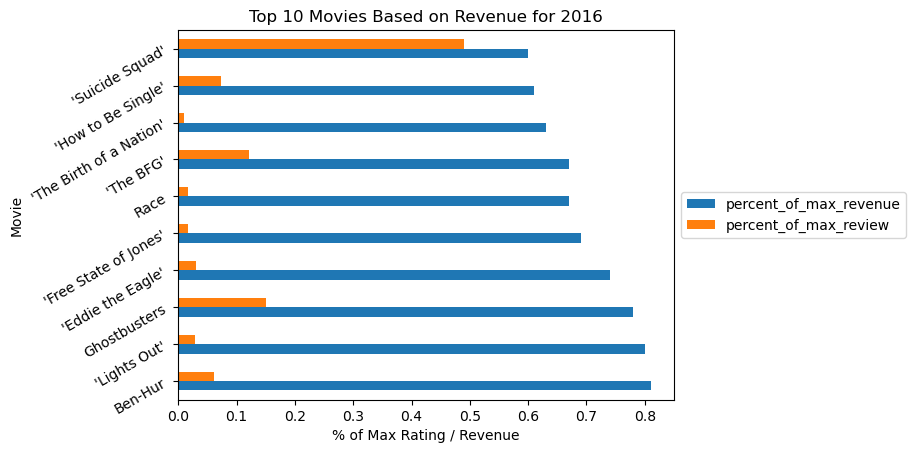

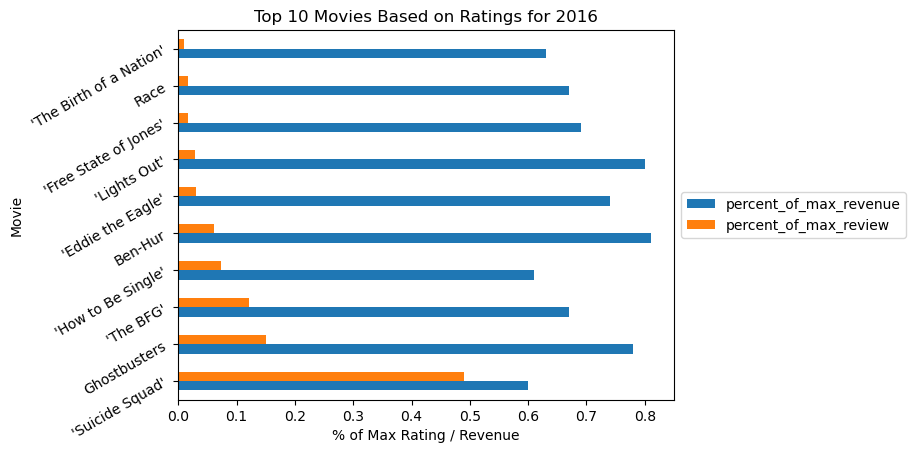

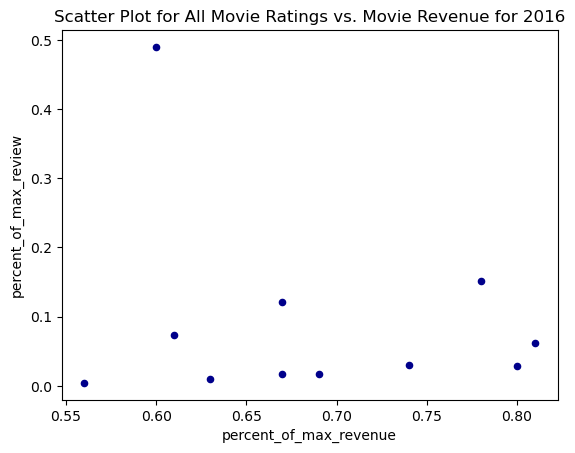

In [279]:
chart_top_revenue_vs_rating(2016)

Correlation Coefficient: 0.117, P Value: 0.005


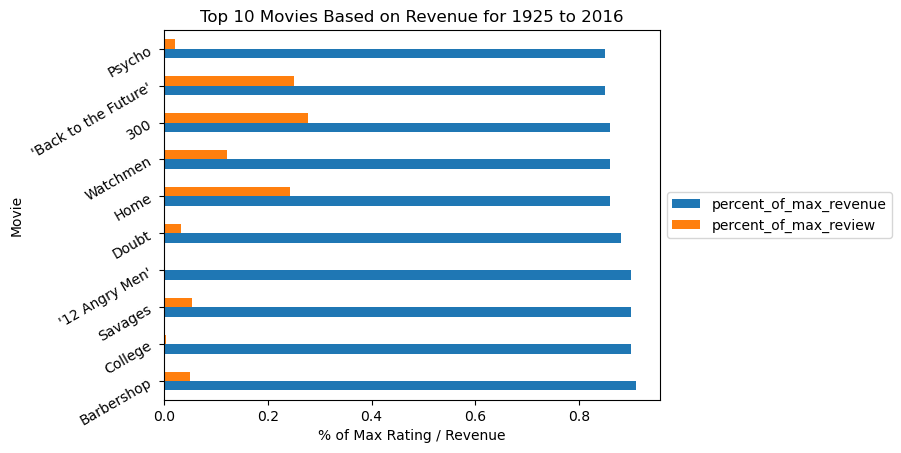

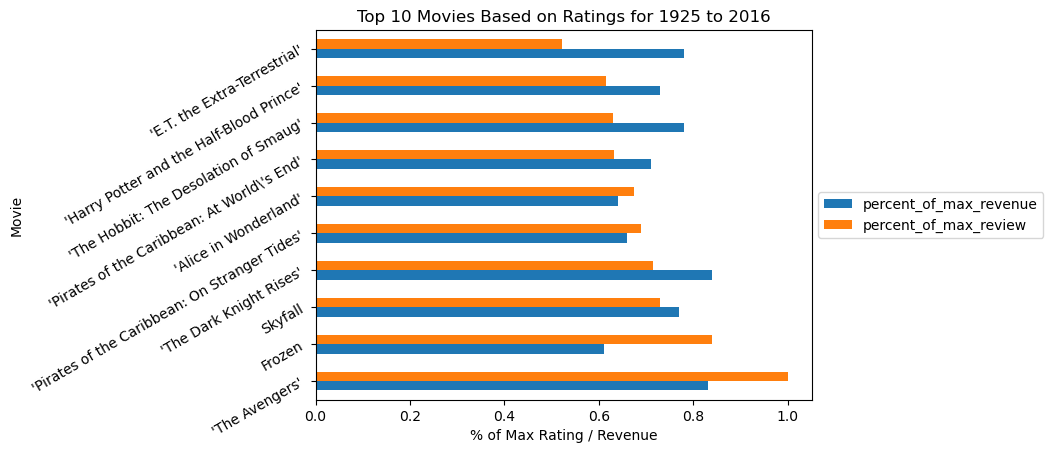

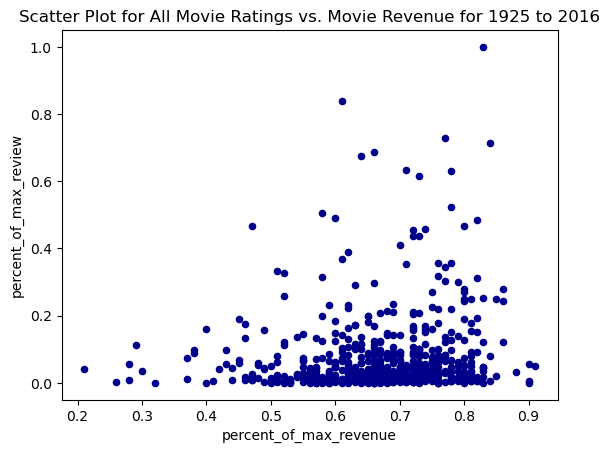

In [280]:
chart_top_revenue_vs_rating()

Based on these bar graphs it appears while there is some relationship between the highest rated movies and the movies generating the highest revenue, this is not true for many of the highest grossing movies in these datasets.

Based on the the scatter plot it appears that the movie review and revenue may have a weak correlation if any.  It appears the movie's rating/review does not greatly affect the revenue that movie can generate.

In [281]:
#reviewing correlation coefficients from above
correlation_coefficients


{'2010': 0.10554835535296057,
 '2011': 0.18989499260645845,
 '2012': 0.5479118102462737,
 '2013': 0.14009095851234984,
 '2014': -0.027931886615818857,
 '2015': 0.5725855449512588,
 '2016': -0.21262265767966368,
 '1925 to 2016': 0.11655989986153037}

In [282]:
#reviewing p_values from above
p_values


{'2010': 0.46569345252011896,
 '2011': 0.27456371006468167,
 '2012': 0.0067987719303472015,
 '2013': 0.5792829350647759,
 '2014': 0.9182141360433463,
 '2015': 0.020445048288178728,
 '2016': 0.5302083091136387,
 '1925 to 2016': 0.004796660120888215}

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

Regarding the datasets used to determine an answer, I would have preferred to have had datasets which were more closely related and complete.  I struggled greatly to find available datasets for this project.  For future projects I will need to familiarize myself with additional sources of data so that may have more options in selecting data.

Regarding data quality, I would hav preferred to include the data which was not read into the dataframes from the original datasets.  I made many attempts; however, i was unable to bring this data into the dataframe efficiently and successfully.  While I believe the data used to create these graphs was useful to answer the question, a more complete dataframe may have procuded somewhat different results.

Regarding research questions, it may be fun to go furthur into this data to see what genre's are prefered based on ratings and revenue as well.  I would most likely have come to a different conlcusion if the question was based only on the qty of movie tickets sold or focusing on revenue from streaming services.